# Setup

In [1]:
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import anderson
from scipy.stats import kstest

In [2]:
np.random.seed(42)

mu, sigma = 0,1

n= 1000

dist1 = np.random.normal(mu,sigma,n)
dist2 = np.random.normal(mu,sigma,n)

# Anderson

In [3]:
result_AD_1 = anderson(dist1, dist = 'norm')
result_AD_2 = anderson(dist2, dist = 'norm')

print(f"---- Distribution_1 ----")
print("AD statistic:", result_AD_1.statistic)
print("Critical values:", result_AD_1.critical_values)
print("Significance levels (%):", result_AD_1.significance_level)

print(f"---- Distribution_2 ----")
print("AD statistic:", result_AD_2.statistic)
print("Critical values:", result_AD_2.critical_values)
print("Significance levels (%):", result_AD_2.significance_level)

---- Distribution_1 ----
AD statistic: 0.3474697767348971
Critical values: [0.574 0.653 0.784 0.914 1.088]
Significance levels (%): [15.  10.   5.   2.5  1. ]
---- Distribution_2 ----
AD statistic: 0.17391075266232292
Critical values: [0.574 0.653 0.784 0.914 1.088]
Significance levels (%): [15.  10.   5.   2.5  1. ]


# Kolmogorov-Smirnov

In [4]:
D_dist1, p_value_dist_1 = kstest(dist1, "norm", args = (mu,sigma))
D_dist2, p_value_dist_2 = kstest(dist2, "norm", args = (mu,sigma))

print(f"---- Distribution_1 ----")
print(f"KS statistic: {D_dist1}")
print(f"p-value: {p_value_dist_1}")

print(f"---- Distribution_2 ----")
print(f"KS statistic: {D_dist2}")
print(f"p-value: {p_value_dist_2}")

---- Distribution_1 ----
KS statistic: 0.017327787320720822
p-value: 0.9196626608357358
---- Distribution_2 ----
KS statistic: 0.041654345419119776
p-value: 0.06048270727276284


# Q-Q Plot

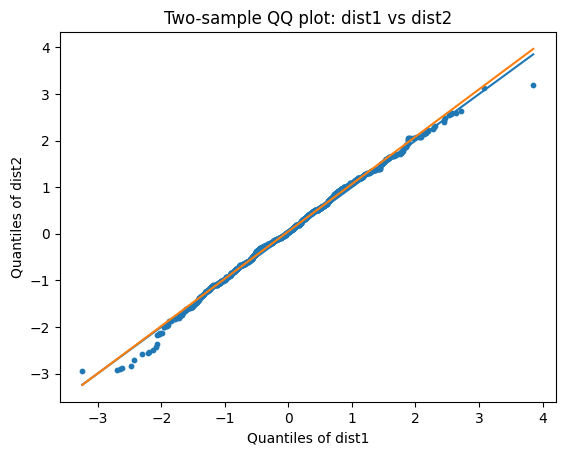

In [5]:
import matplotlib.pyplot as plt

# Sort the data
dist1_sorted = np.sort(dist1)
dist2_sorted = np.sort(dist2)
a, b = np.polyfit(dist1_sorted, dist2_sorted, 1)

# Make QQ plot
plt.figure()
plt.scatter(dist1_sorted, dist2_sorted, s=10)

# Reference line y = x
min_val = min(dist1_sorted.min(), dist2_sorted.min())
max_val = max(dist1_sorted.max(), dist2_sorted.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.plot(dist1_sorted, a * dist1_sorted + b)

plt.xlabel("Quantiles of dist1")
plt.ylabel("Quantiles of dist2")
plt.title("Two-sample QQ plot: dist1 vs dist2")
plt.show()

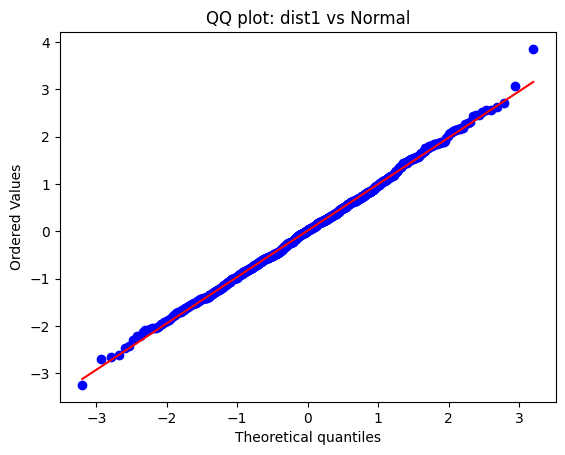

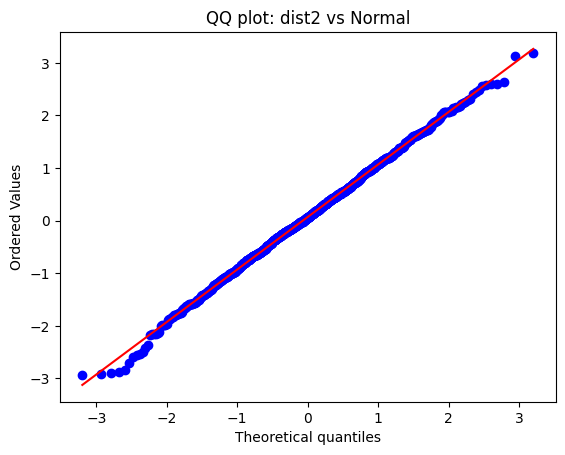

In [6]:
import scipy.stats as stats

stats.probplot(dist1, dist="norm", plot=plt)
plt.title("QQ plot: dist1 vs Normal")
plt.show()

stats.probplot(dist2, dist="norm", plot=plt)
plt.title("QQ plot: dist2 vs Normal")
plt.show()


# Correct Q-Q Plot formatting

In [7]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [53]:
cmap_color = "cool"

# --- Compute QQ data ---
(osm, osr), (slope, intercept, r) = stats.probplot(dist1, dist="norm")
n = len(osr)

# Pointwise negative log-likelihood under theoretical PDF
# (HO ground state ~ Gaussian with known sigma)
sigma = 1.0  # <-- set this to your theoretical value
nll = -stats.norm.logpdf(osr, loc=0, scale=sigma)

# Plotting positions
p = (np.arange(1, n + 1) - 0.5) / n

# Normal PDF at theoretical quantiles
pdf = stats.norm.pdf(osm)

# Standard error of quantiles
sigma_q = np.sqrt(p * (1 - p)) / (np.sqrt(n) * pdf)

# 95% confidence envelope
z_alpha = 1.96
upper = osm + z_alpha * sigma_q
lower = osm - z_alpha * sigma_q

# Detrended residuals
qq_res = osr - osm

sizes = 20 + 20 * (np.abs(qq_res) / np.max(np.abs(qq_res)))

from matplotlib import colors

vmin = np.percentile(nll, 5)
vmax = np.percentile(nll, 95)

norm = colors.Normalize(vmin=vmin, vmax=vmax)


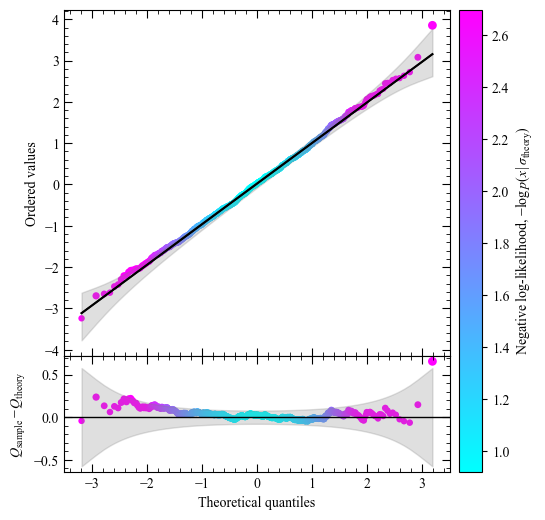

In [59]:
# --- Figure layout ---
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

ax_qq = fig.add_subplot(gs[0])
ax_res = fig.add_subplot(gs[1], sharex=ax_qq)

# -------------------
# Top: QQ plot
# -------------------
sc = ax_qq.scatter(
    osm, osr,
    c=nll,
    norm = norm,
    cmap= cmap_color,
    s=sizes,
    edgecolors='none'
)

ax_qq.plot(
    osm,
    slope * osm + intercept,
    color='black',
    lw=1.2,
    alpha=0.8
)


ax_qq.plot(osm, slope * osm + intercept, color='black', lw=1.5)
ax_qq.fill_between(osm, lower, upper, color='grey', alpha=0.25)

ax_qq.set_ylabel("Ordered values")
ax_qq.minorticks_on()
ax_qq.tick_params(which='major', length=6, direction='in', top=True, right=True)
ax_qq.tick_params(which='minor', length=3, direction='in', top=True, right=True)

plt.setp(ax_qq.get_xticklabels(), visible=False)

# -------------------
# Bottom: detrended QQ
# -------------------
ax_res.scatter(
    osm, qq_res,
    c=nll,
    norm = norm,
    cmap= cmap_color,
    s=sizes,
    edgecolors='none'
)


# ±2σ band
ax_res.axhline(0, color='black', lw=1)

ax_res.set_xlabel("Theoretical quantiles")
ax_res.set_ylabel(r"$Q_{\mathrm{sample}} - Q_{\mathrm{theory}}$")

ax_res.minorticks_on()
ax_res.tick_params(which='major', length=6, direction='in', top=True, right=True)
ax_res.tick_params(which='minor', length=3, direction='in', top=True, right=True)

res_upper =  z_alpha * sigma_q
res_lower = -z_alpha * sigma_q

ax_res.fill_between(
    osm,
    res_lower,
    res_upper,
    color='grey',
    alpha=0.25
)


# -------------------
# Colorbar (|z|)
# -------------------
cbar = fig.colorbar(sc, ax=[ax_qq, ax_res], pad=0.02)
cbar.set_label(
    r"Negative log-likelihood, $-\log p(x\,|\,\sigma_{\mathrm{theory}})$"
)


plt.show()


In [40]:
stats.norm.cdf(7)  # ~1 - 1e-12  → massive AD penalty
stats.norm.cdf(2)  # ~0.977     → modest


np.float64(0.9772498680518208)